In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
data = pd.read_csv('heart-disease.csv')
print(f'The shape of data is {data.shape}')
print(f'The columns namrs is  {data.columns}')

The shape of data is (303, 14)
The columns namrs is  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Descriptive Analysis

In [5]:
unique_numbers = []
for i in data.columns:
    x = data[i].value_counts().count()
    unique_numbers.append(x)
    
pd.DataFrame(unique_numbers,index = data.columns,columns=["Total unique_numbers "])
        

,Total unique_numbers
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [6]:
numeric_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categoric_var = ['sex' , 'cp' , 'fbs' , 'restecg' , 'exang' , 'slope' , 'ca' , 'thal' , 'target']

In [7]:
data[numeric_var].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


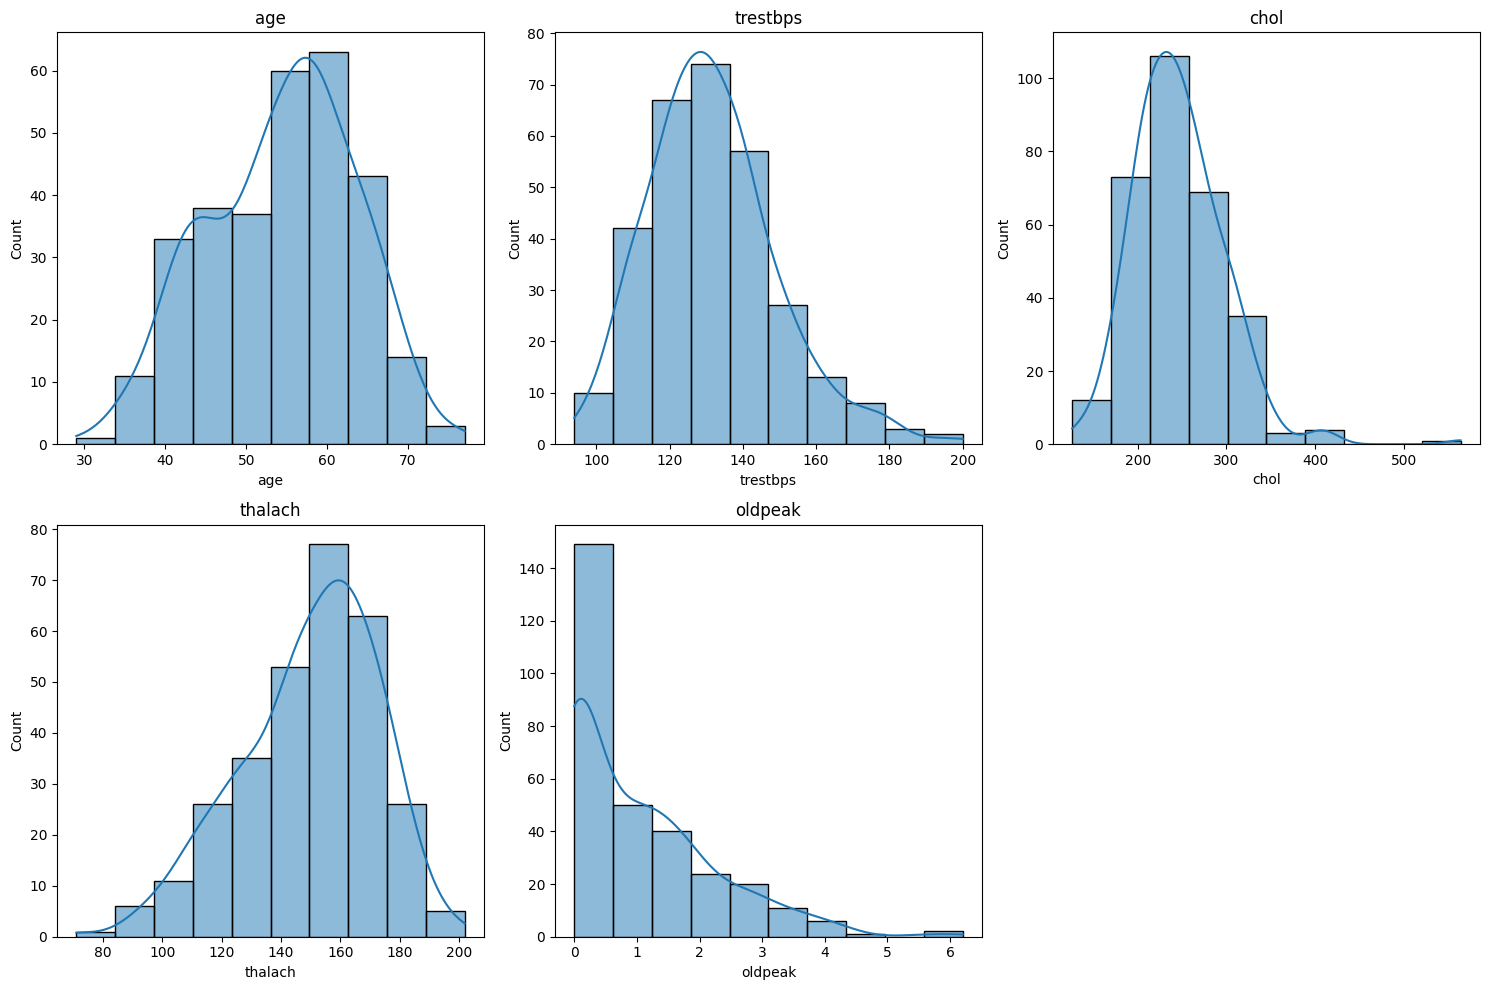

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

n_rows = 2
n_cols = 3

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))

axes = axes.flatten()

for idx, var in enumerate(numeric_var):
    sns.histplot(data[var], bins=10, kde=True, ax=axes[idx])
    axes[idx].set_title(var)

for ax in axes[len(numeric_var):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


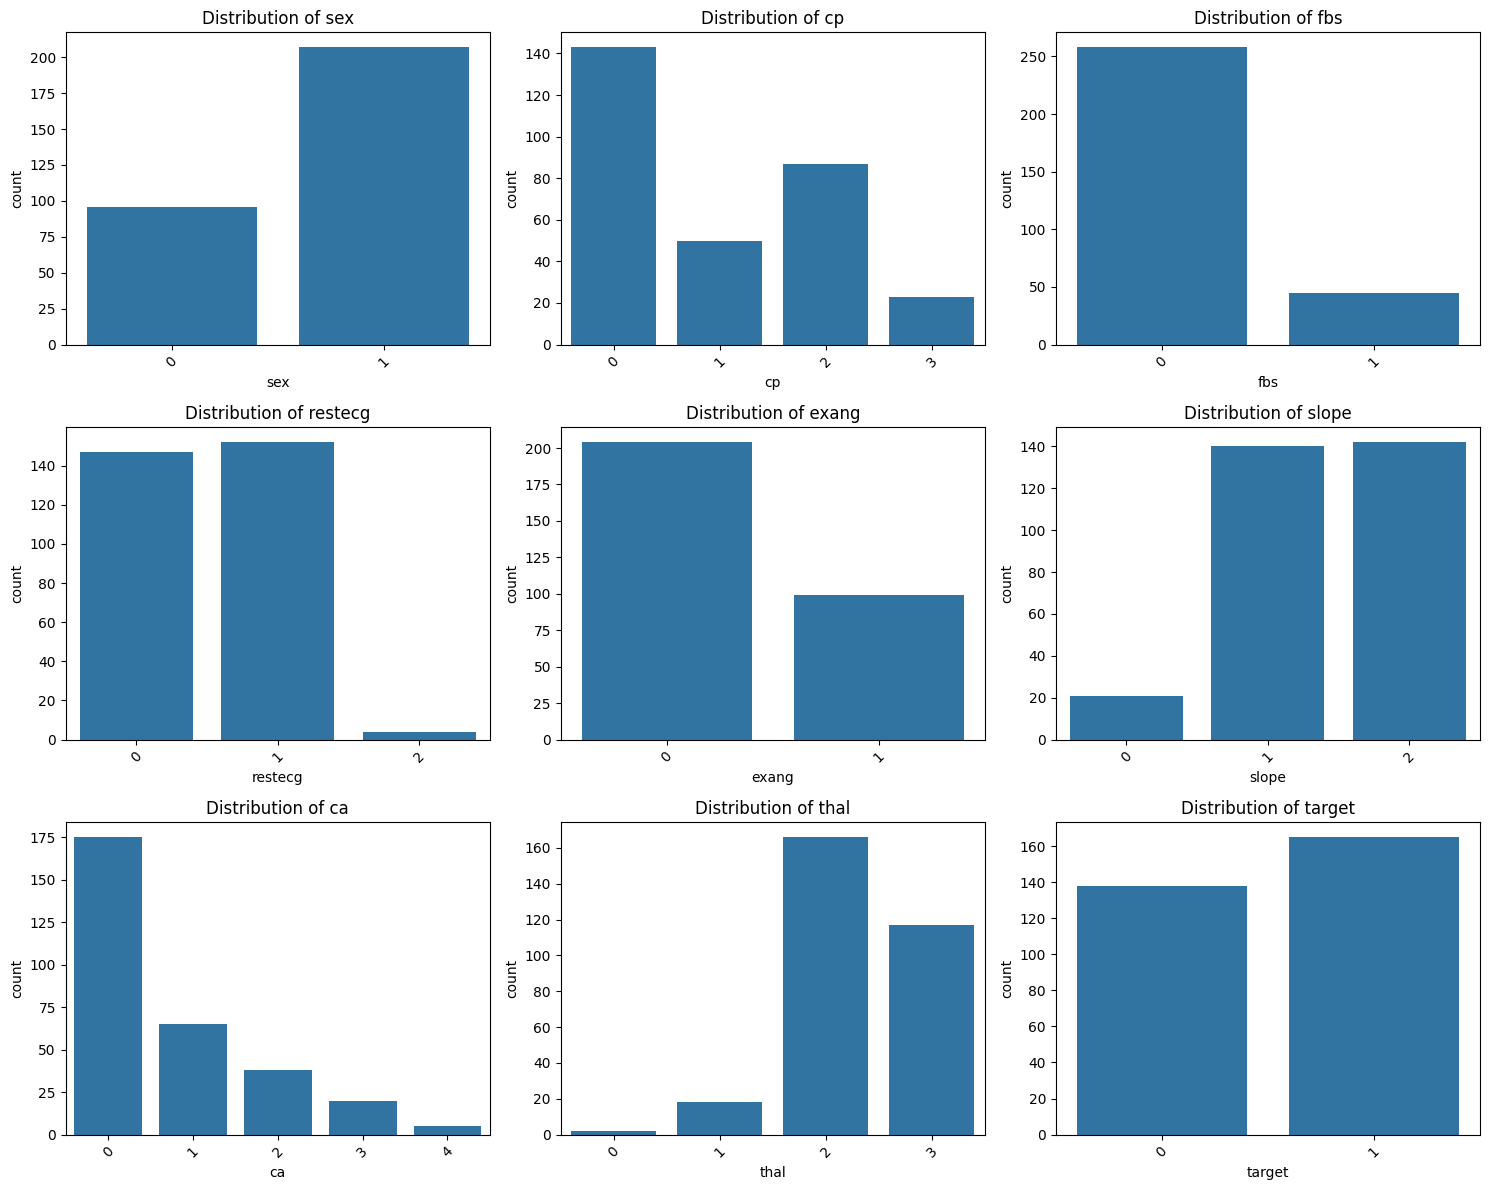

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

categoric_var = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

n_rows = 3
n_cols = 3

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12))

axes = axes.flatten()

for idx, var in enumerate(categoric_var):
    sns.countplot(data=data, x=var, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {var}')
    axes[idx].tick_params(axis='x', rotation=45)

for j in range(len(categoric_var), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


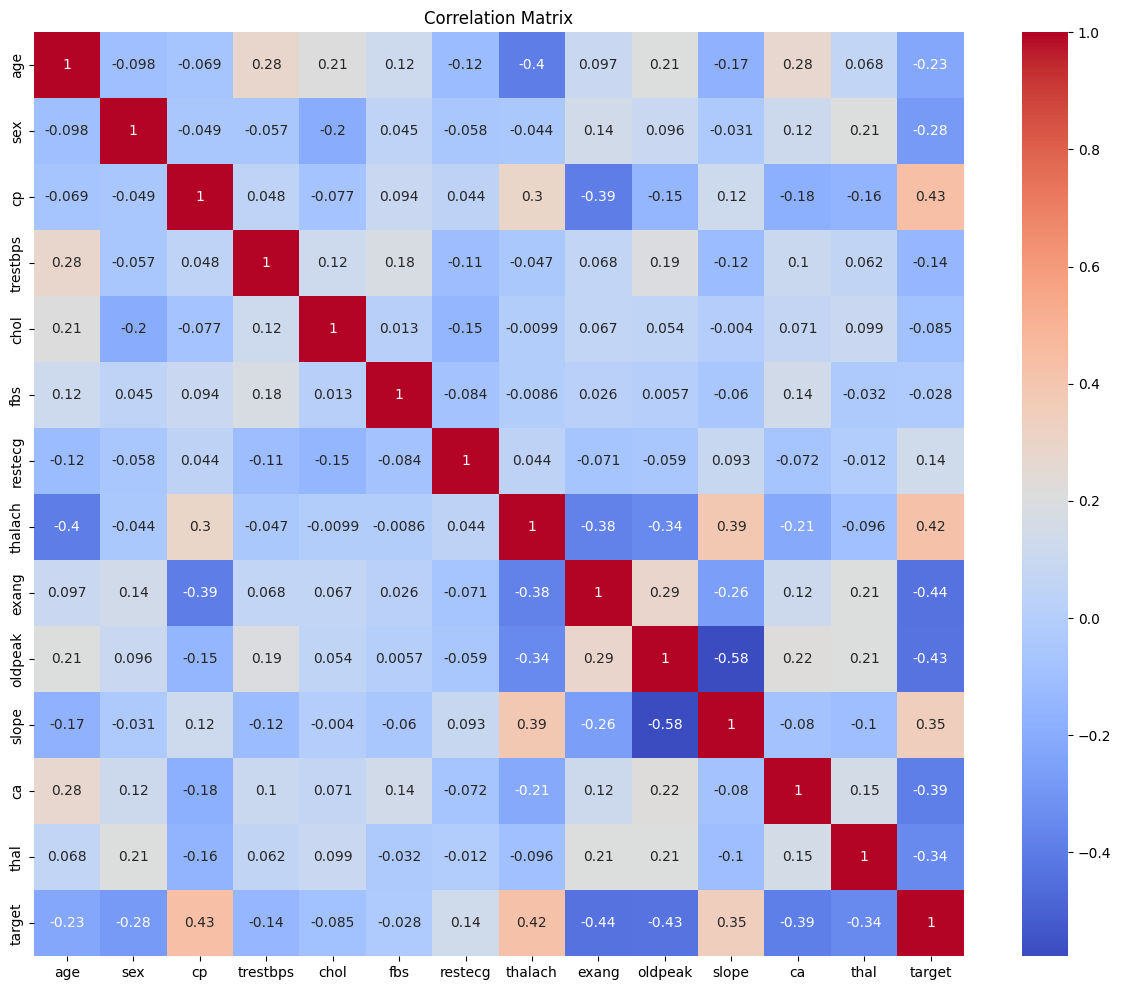

In [10]:
fig , ax = plt.subplots(figsize=(15,12))

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

we use Analysis of Variance (ANOVA) to determine the relationship between a categorical dependent variable (target) and several continuous independent variables (age, trestbps, chol, thalach, oldpeak). ANOVA helps us test whether there are significant differences in the means of these continuous variables across the categories of the target variable.

In [11]:
for var in numeric_var:
    model = smf.ols(f'{var} ~ C(target)', data=data).fit()
    
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    print(f'\nANOVA for {var} based on target:')
    print(anova_table)
    
    p_value = anova_table['PR(>F)'][0]
    if p_value < 0.05:
        print("Significant difference in group means exists.")
        
        tukey = pairwise_tukeyhsd(endog=data[var], groups=data['target'], alpha=0.05)
        
        print("\nTukey's HSD Results:")
        print(tukey)
    else:
        print("No significant difference in group means exists.")



ANOVA for age based on target:
                 sum_sq     df        F    PR(>F)
C(target)   1266.008439    1.0  16.1167  0.000075
Residual   23644.328195  301.0      NaN       NaN
Significant difference in group means exists.


C:\Users\Shiraz1\AppData\Local\Temp\ipykernel_15104\2744193143.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]



Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -4.1045 0.0001 -6.1164 -2.0925   True
----------------------------------------------------

ANOVA for trestbps based on target:
                 sum_sq     df         F    PR(>F)
C(target)   1951.180716    1.0  6.458169  0.011546
Residual   90939.928195  301.0       NaN       NaN
Significant difference in group means exists.


C:\Users\Shiraz1\AppData\Local\Temp\ipykernel_15104\2744193143.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]



Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -5.0955 0.0115 -9.0413 -1.1498   True
----------------------------------------------------

ANOVA for chol based on target:
                  sum_sq     df         F   PR(>F)
C(target)    5894.672881    1.0  2.202983  0.13879
Residual   805406.205007  301.0       NaN      NaN
No significant difference in group means exists.

ANOVA for thalach based on target:
                  sum_sq     df          F        PR(>F)
C(target)   28181.568145    1.0  65.120104  1.697338e-14
Residual   130261.646377  301.0        NaN           NaN
Significant difference in group means exists.


C:\Users\Shiraz1\AppData\Local\Temp\ipykernel_15104\2744193143.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
C:\Users\Shiraz1\AppData\Local\Temp\ipykernel_15104\2744193143.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]



Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  19.3652   0.0 14.6428 24.0876   True
---------------------------------------------------

ANOVA for oldpeak based on target:
               sum_sq     df          F        PR(>F)
C(target)   75.521253    1.0  68.551439  4.085346e-15
Residual   331.603499  301.0        NaN           NaN
Significant difference in group means exists.


C:\Users\Shiraz1\AppData\Local\Temp\ipykernel_15104\2744193143.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]



Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -1.0025   0.0 -1.2407 -0.7642   True
---------------------------------------------------


 In this section, we use the Chi-square test to examine the relationship between independent categorical variables and the target variable, which is also a categorical variable.






In [12]:
for var in categoric_var:
    contingency_table = pd.crosstab(data[var], data['target'])
    print(f"Contingency Table for {var} vs Target:\n")
    print(contingency_table.to_string())
    print("\n" + "-"*50 + "\n")
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Chi-square test results for {var} vs Target:")
    print(f"Chi-square value: {chi2:.4f}")
    print(f"P-value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected frequencies:")
    print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns).to_string())
    print("\n" + "="*50 + "\n")

Contingency Table for sex vs Target:

target    0   1
sex            
0        24  72
1       114  93

--------------------------------------------------

Chi-square test results for sex vs Target:
Chi-square value: 22.7172
P-value: 0.0000
Degrees of Freedom: 1
Expected frequencies:
target          0           1
sex                          
0       43.722772   52.277228
1       94.277228  112.722772


Contingency Table for cp vs Target:

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

--------------------------------------------------

Chi-square test results for cp vs Target:
Chi-square value: 81.6864
P-value: 0.0000
Degrees of Freedom: 3
Expected frequencies:
target          0          1
cp                          
0       65.128713  77.871287
1       22.772277  27.227723
2       39.623762  47.376238
3       10.475248  12.524752


Contingency Table for fbs vs Target:

target    0    1
fbs             
0       116  142
1        22   2

In [15]:
class_count = data['target'].value_counts(normalize=True)* 100
class_count

target
1    54.455446
0    45.544554
Name: proportion, dtype: float64

Training and Evaluating a Gaussian Naive Bayes Model

In [18]:

continuous_features = ['age', 'trestbps', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']

X_categorical = pd.get_dummies(data[categorical_features], drop_first=True)

X = pd.concat([data[continuous_features], X_categorical], axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

F1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {F1_score:.2f}')


Accuracy: 0.82
Precision: 0.78
Recall: 0.93
F1 Score: 0.84


Plotting Confusion Matrix for Model Evaluation

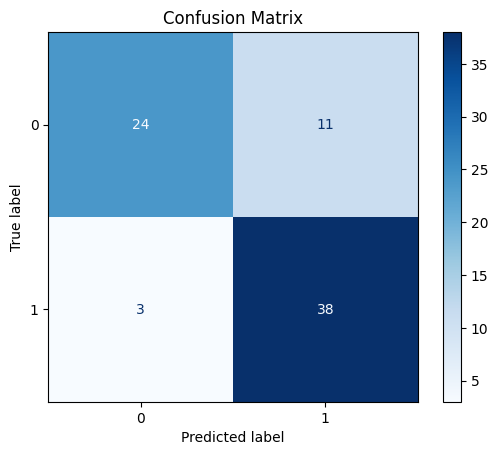

In [19]:

def conf_matriy_plot(model, x_data, y_data):
    model_pred = model.predict(x_data)
    
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    
    plt.title('Confusion Matrix')
    plt.show()

conf_matriy_plot(gnb, X_test, y_test)
